## Exercice 7 : Classification avec SVM

Inspiré de https://scikit-learn.org/stable/modules/svm.html



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets


In [2]:
#import iris data

iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features for further visualizations.
y = iris.target


#### QUESTION 1: 
Print X, y, X.shape, y.shape to understand how the rest of the code will work.
- In practice, X contains the observations and y contains the corresponding labels 
- The observations have a fixed dimension. Here, each observation corresponds to two (initially four) lengths measured on iris flowers.
- A label is given to each flower. Here it conrresponds to an iris type.
- The number of rows in X and the number of values in y are the same and correspond to the number of observed iris flowers.

If this is *cristal clear*, you can continue executing the instructions bellow and learn to the computer how to distinguish the different types of iris using the two selected parameters.



In [3]:
#create an instance of the supervised SVM classifier, and learn.


svc = svm.SVC(kernel='linear', C=1.0)
svc.fit(X, y)
title = 'SVC with linear kernel'




In [4]:
def showRes(X, Y,classifier,title):
  """
  function to nicely show the predictions of the classifier
  """
  # create a mesh to plot in
  x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),np.arange(y_min, y_max, 0.02))
  
  #predict the labels on a grid
  Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])

  #plot the results...

  #...Put the result into a color plot
  plt.plot()
  Z = Z.reshape(xx.shape)
  plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

  #... Plot also the training points
  plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.coolwarm)
  plt.xlabel('Sepal length')
  plt.ylabel('Sepal width')
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())
  plt.xticks(())
  plt.yticks(())
  plt.title(title)
  
  plt.show()


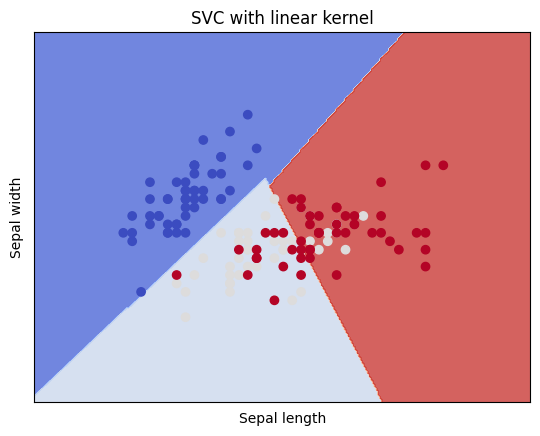

In [5]:
showRes(X, y,svc,title)


##### QUESTION 2 :
Now suppose that we observe a new iris flower having parameters [7.1,  3.0]. In which category will by this flower?


In [6]:
svc.predict(np.array([7.1,  3.0]).reshape(1,-1))


array([2])

-> Category 2

##### QUESTION 3 :
Until now, we have learned how to distinguish the different kinds of iris but we have not validated the efficiency of our strategy. 

-> Code a leave-one-out strategy and a 5-folds strategy to measure the training efficiency of the algorithm. 


In [7]:

def LeaveOneOut(X,Y,classifier):
  total_predictions=0
  total_good_predictions=0
  
  for i in range(X.shape[0]-1):
    X_m_i=np.delete(X,i,axis=0)
    y_m_i=np.delete(y,i,axis=0)
    
    classifier.fit(X_m_i, y_m_i)
    
    realLabel=y[i]
    
    tmp=classifier.predict(X[i,:].reshape(1,-1))
    predictedLabel=tmp[0]
    
    #print(y[i],svc.predict(X[i,:].reshape(1,-1)))
    
    total_predictions=total_predictions+1
    
    if realLabel==predictedLabel:
      total_good_predictions=total_good_predictions+1
    
    prct_accuracy=100.*float(total_good_predictions)/float(total_predictions)
    
  return [total_predictions,total_good_predictions,prct_accuracy]





In [8]:

X_iris = iris.data[:, :2]  # we only take the first two features for further visualizations.
y_iris = iris.target

svc = svm.SVC(kernel='linear', C=1.0)
[tot_predictions,tot_good_predictions,prct_acc]=LeaveOneOut(X_iris,y_iris,svc)


print('Total number of predictions: '+str(tot_predictions))
print('Total number of good predictions: '+str(tot_good_predictions))
print('Percentage accuracy: '+str(prct_acc))



Total number of predictions: 149
Total number of good predictions: 120
Percentage accuracy: 80.53691275167785



#### QUESTION 4:
Test alternative kernels to the linear kernel and measure whether they are better than the linear kernel in our context. To do so, you can replace the commands:
- svc = svm.SVC(kernel='linear', C=1.0)
- svc.fit(X, y)
- title = 'SVC with linear kernel'

by:

**(ALTERNATIVE 1)**
- svc = svm.SVC(kernel='rbf', gamma=0.7, C=1.0)
- svc.fit(X, y)
- title = 'SVC with RBF (Gaussian) kernel'

**(ALTERNATIVE 2)**
- svc = svm.SVC(kernel='poly', degree=3, C=1.0)
- svc.fit(X, y)
- title = 'SVC with polynomial (degree 3) kernel'



##### Question 4 -- Alternative 1

Total number of predictions: 149
Total number of good predictions: 119
Percentage accuracy: 79.86577181208054


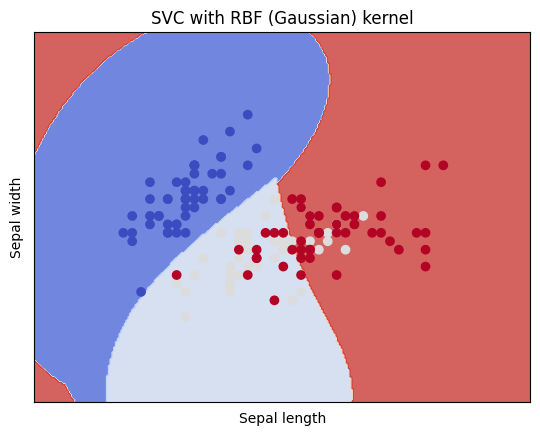

In [9]:

X_iris = iris.data[:, :2]  # we only take the first two features for further visualizations.
y_iris = iris.target

svc = svm.SVC(kernel='rbf', gamma=0.7, C=1.0)
[tot_predictions,tot_good_predictions,prct_acc]=LeaveOneOut(X_iris,y_iris,svc)


print('Total number of predictions: '+str(tot_predictions))
print('Total number of good predictions: '+str(tot_good_predictions))
print('Percentage accuracy: '+str(prct_acc))

showRes(X_iris,y_iris,svc,'SVC with RBF (Gaussian) kernel')


##### Question 4 -- Alternative 2

Total number of predictions: 149
Total number of good predictions: 121
Percentage accuracy: 81.20805369127517


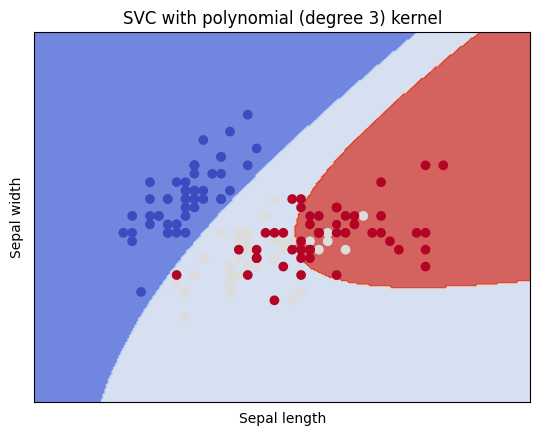

In [10]:

X_iris = iris.data[:, :2]  # we only take the first two features for further visualizations.
y_iris = iris.target

svc = svm.SVC(kernel='poly', degree=3, C=1.0,gamma='auto')
[tot_predictions,tot_good_predictions,prct_acc]=LeaveOneOut(X_iris,y_iris,svc)


print('Total number of predictions: '+str(tot_predictions))
print('Total number of good predictions: '+str(tot_good_predictions))
print('Percentage accuracy: '+str(prct_acc))

showRes(X_iris,y_iris,svc,'SVC with polynomial (degree 3) kernel')
